## **Student Depression Analysis and Prediction**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/204005F-ML_Assignment/data/Student Depression Dataset.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2.0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,NaN,3.0,1.0,No,1
1,8.0,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26.0,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30.0,Female,28.0,Varanasi,Student,3.0,0.0,NaN,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32.0,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,NaN,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685.0,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686.0,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689.0,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690.0,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27896.000000,27890.000000,27895.000000,27897.000000,27893.000000,27898.00000,27895.000000,27895.000000,27896.000000,27901.000000
mean,70429.684220,25.822445,3.141387,0.000430,7.656331,2.94401,0.000681,7.156551,3.139877,0.585499
std,40634.149158,4.905390,1.381467,0.043995,1.470644,1.36111,0.044399,3.707610,1.437373,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,35033.250000,21.000000,2.000000,0.000000,6.290000,2.00000,0.000000,4.000000,2.000000,0.000000
50%,70654.500000,25.000000,3.000000,0.000000,7.770000,3.00000,0.000000,8.000000,3.000000,1.000000
75%,105808.250000,30.000000,4.000000,0.000000,8.920000,4.00000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.00000,4.000000,12.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,5
Gender,12
Age,11
City,8
Profession,8
Academic Pressure,6
Work Pressure,4
CGPA,8
Study Satisfaction,3
Job Satisfaction,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27896 non-null  float64
 1   Gender                                 27889 non-null  object 
 2   Age                                    27890 non-null  float64
 3   City                                   27893 non-null  object 
 4   Profession                             27893 non-null  object 
 5   Academic Pressure                      27895 non-null  float64
 6   Work Pressure                          27897 non-null  float64
 7   CGPA                                   27893 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27895 non-null  float64
 10  Sleep Duration                         27895 non-null  object 
 11  Di

In [ ]:
X = df.drop(columns=['Depression'])
y = df['Depression']

In [ ]:
df_01=X.copy()
df_02=y.copy()
df_02 = df_02.to_frame()

In [ ]:
df_01

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2.0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,NaN,3.0,1.0,No
1,8.0,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26.0,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30.0,Female,28.0,Varanasi,Student,3.0,0.0,NaN,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32.0,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,NaN,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685.0,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes
27897,140686.0,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes
27898,140689.0,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No
27899,140690.0,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No


In [ ]:
# Drop unique column
if "id" in df_01.columns:
    df_01 = df_01.drop(columns=["id"])

In [ ]:
df_01

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,NaN,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,NaN,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,NaN,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No


In [ ]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27889 non-null  object 
 1   Age                                    27890 non-null  float64
 2   City                                   27893 non-null  object 
 3   Profession                             27893 non-null  object 
 4   Academic Pressure                      27895 non-null  float64
 5   Work Pressure                          27897 non-null  float64
 6   CGPA                                   27893 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27895 non-null  float64
 9   Sleep Duration                         27895 non-null  object 
 10  Dietary Habits                         27892 non-null  object 
 11  De

In [ ]:
numerical_cols=['Age','CGPA','Work/Study Hours','Financial Stress']
categorical_cols=['Gender','City','Profession','Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

Handling Missing values

---



In [ ]:
# Use mean - fill null values in numerical columns
for n_col in numerical_cols:
    df_01[n_col] = df_01[n_col].fillna(df_01[n_col].median())
# Use mode - fill null values in categorical columns
for c_col in categorical_cols:
    df_01[c_col] = df_01[c_col].fillna(df_01[c_col].mode()[0])
df_01.head(10)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,7.77,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,1.0,1.0,No
5,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No
6,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No
7,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes
8,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Unhealthy,B.Ed,Yes,12.0,3.0,No
9,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,8.0,5.0,No


In [ ]:
df_01.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


In [ ]:
# Check the values of categorical features
for c_col in categorical_cols:
    print(c_col, ": ", df_01[c_col].unique())
print('\nDepression : ', df_02['Depression'].unique())

Gender :  ['Male' 'Female']
City :  ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession :  ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Academic Pressure :  [5. 2. 3. 4. 1. 0.]
Work Pressure :  [0. 5. 2.]
Study Satisfaction :  [2. 5. 3. 4. 1. 0.]
Job Satisfaction :  [0. 3. 4. 2. 1.]
Sleep Duration :  ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Diet

Noise handling in numerical features

---



In [ ]:
# Skewness for numerical features
skewness = df_01[numerical_cols].skew()

# Display features with skewness
print(f'Skewness : \n{skewness}')

Skewness : 
Age                 0.132502
CGPA               -0.113402
Work/Study Hours   -0.454786
Financial Stress   -0.130276
dtype: float64


Handling Skewness - Apply transformations

---



In [ ]:
positive_skewed = skewness[skewness > 1].index.tolist()
negative_skewed = skewness[skewness < -1].index.tolist()
print("Positive Skewed Columns ", positive_skewed, '\n')
print("Negative Skewed Columns :", negative_skewed, '\n')

for p_col in positive_skewed:
    df_01[p_col] = np.log1p(df_01[p_col])

for n_col in negative_skewed:
    df_01[n_col] = np.log1p(df_01[n_col].max() - df_01[n_col] + 1)

Positive Skewed Columns  [] 

Negative Skewed Columns : [] 




Handling Outliers

---




Before Handling Outliers: 



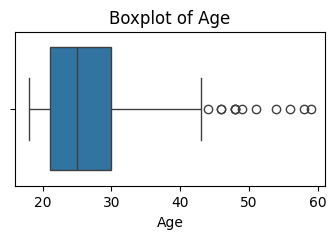

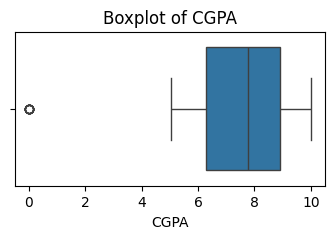

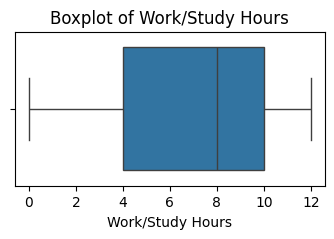

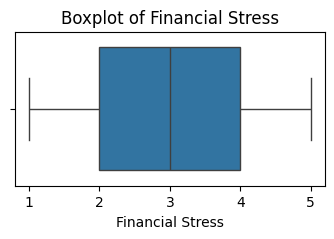

In [ ]:
print('Before Handling Outliers: \n')

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df_01[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:
# IQR Calculate - numerical columns
Q1 = df_01[numerical_cols].quantile(0.25)
Q3 = df_01[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_01[numerical_cols] < lower_bound) | (df_01[numerical_cols] > upper_bound)

# Count the number of outliers per column (Numerical)
outlier_counts = outliers.sum()
print(f'Outliers detected in numerical columns: \n{outlier_counts}')

Outliers detected in numerical columns: 
Age                 12
CGPA                 9
Work/Study Hours     0
Financial Stress     0
dtype: int64


In [ ]:
# Apply capping to numerical columns
for col in numerical_cols:
    df_01[col] = np.where(df_01[col] < lower_bound[col], lower_bound[col], df_01[col])
    df_01[col] = np.where(df_01[col] > upper_bound[col], upper_bound[col], df_01[col])

# Check if bounds or not
out_of_bounds = (df_01[numerical_cols] < lower_bound) | (df_01[numerical_cols] > upper_bound)
print("\nRemaining Outliers - After capping: \n", out_of_bounds.sum())

# Display the cleaned DataFrame Shape
print("\nShape of DataFrame after capping the outliers:", df_01.shape)


Remaining Outliers - After capping: 
 Age                 0
CGPA                0
Work/Study Hours    0
Financial Stress    0
dtype: int64

Shape of DataFrame after capping the outliers: (27901, 16)


In [ ]:
df_01.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


After Handling Outliers: 



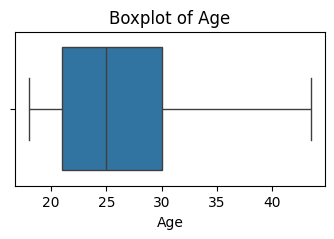

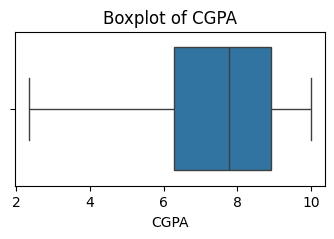

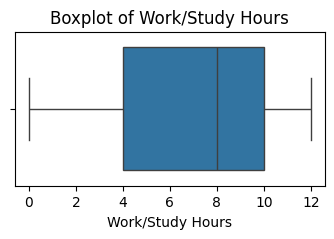

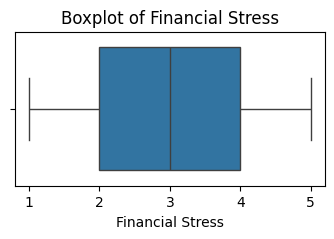

In [ ]:
print('After Handling Outliers: \n')

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df_01[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()



---



In [ ]:
df_01

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,7.77,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No


Encoding

In [ ]:
# Encode category columns
label_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness','Gender','Sleep Duration']

le = LabelEncoder()
for col in label_cols:
    df_01[col] = le.fit_transform(df_01[col])

df_01

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,0,Healthy,B.Pharm,1,3.0,1.0,0
1,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,0,Moderate,BSc,0,3.0,2.0,1
2,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,2,Healthy,BA,0,9.0,1.0,1
3,0,28.0,Varanasi,Student,3.0,0.0,7.77,2.0,0.0,1,Moderate,BCA,1,4.0,5.0,1
4,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,0,Moderate,Class 12,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,0,Unhealthy,Class 12,1,7.0,1.0,1
27897,1,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,2,Healthy,MSc,0,0.0,3.0,1
27898,1,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,0,Unhealthy,MD,0,12.0,2.0,0
27899,0,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,2,Healthy,Class 12,1,10.0,5.0,0


In [ ]:
#One-Hote Encode
df_encode= pd.get_dummies(df_01, columns=['City', 'Profession', 'Dietary Habits', 'Degree'])

encode_cols=['City', 'Profession', 'Dietary Habits', 'Degree']
oh_encoder = OneHotEncoder(sparse_output=False)
oh_encodered=oh_encoder.fit_transform(df_01[encode_cols])
oh_df=pd.DataFrame(oh_encodered,columns=oh_encoder.get_feature_names_out(encode_cols),index=df.index)
oh_df=oh_df.astype(int)
df_03 = pd.concat([df_01.drop(encode_cols, axis=1), oh_df], axis=1)
df_03

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,33.0,5.0,0.0,8.97,2.0,0.0,0,1,3.0,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,2.0,0.0,5.90,5.0,0.0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,2,0,9.0,...,0,0,0,0,0,0,0,0,0,0
3,0,28.0,3.0,0.0,7.77,2.0,0.0,1,1,4.0,...,0,0,0,0,0,0,0,0,0,0
4,0,25.0,4.0,0.0,8.13,3.0,0.0,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,0.0,5.75,5.0,0.0,0,1,7.0,...,0,0,0,0,0,0,0,0,0,0
27897,1,27.0,2.0,0.0,9.40,3.0,0.0,2,0,0.0,...,0,0,0,0,0,0,0,1,0,0
27898,1,31.0,3.0,0.0,6.61,4.0,0.0,0,0,12.0,...,0,0,0,0,1,0,0,0,0,0
27899,0,18.0,5.0,0.0,6.88,2.0,0.0,2,1,10.0,...,0,0,0,0,0,0,0,0,0,0


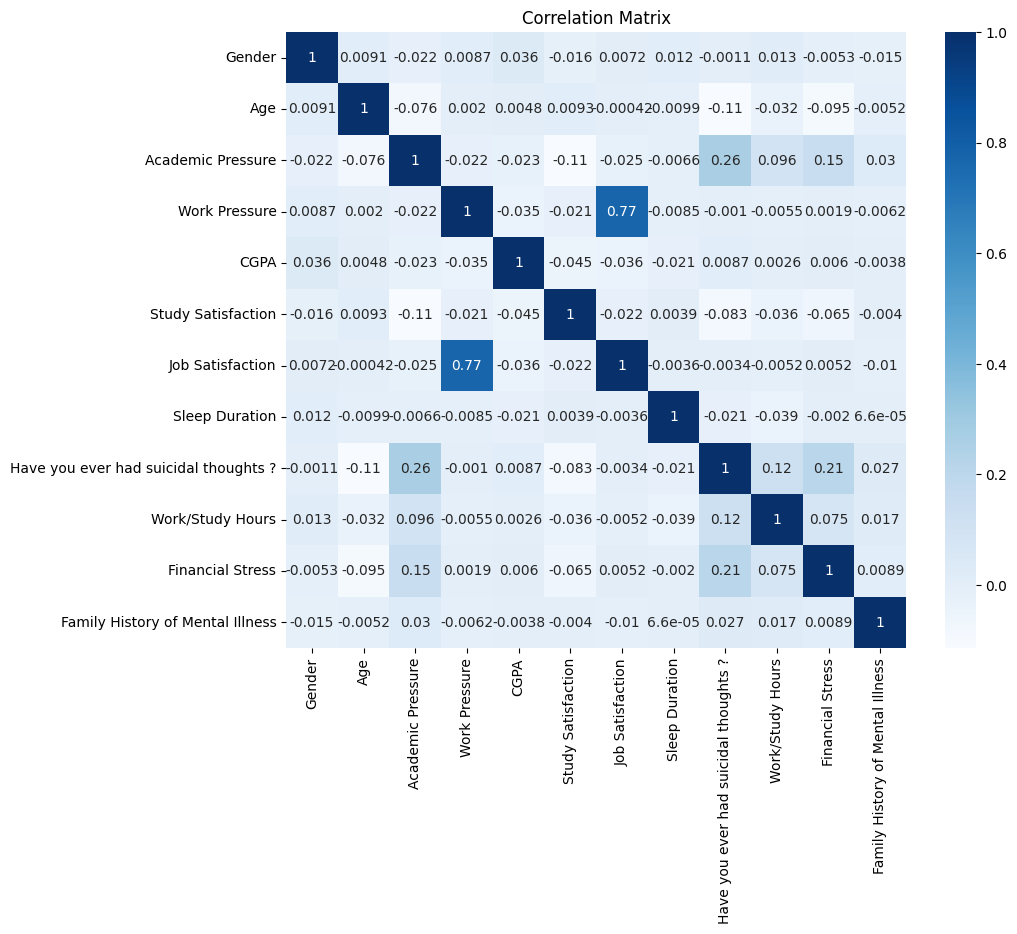

In [ ]:
# Visualize correlations -exclude some columns
plt.figure(figsize=(10,8))
sns.heatmap(df_encode.select_dtypes(include=['number']).corr(),cmap="Blues", annot=True)
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing - Normalization

---



Z-score Normalization

In [ ]:
scaler_z = StandardScaler()
df_03[numerical_cols] = scaler_z.fit_transform(df_03[numerical_cols])

In [ ]:
df_03

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,1.468445,5.0,0.0,0.894900,2.0,0.0,0,1,-1.121270,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.371987,2.0,0.0,-1.197708,5.0,0.0,0,0,-1.121270,...,0,0,0,0,0,0,0,0,0,0
2,1,1.059460,3.0,0.0,-0.427465,5.0,0.0,2,0,0.497217,...,0,0,0,0,0,0,0,0,0,0
3,0,0.445983,3.0,0.0,0.076942,2.0,0.0,1,1,-0.851522,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.167495,4.0,0.0,0.322330,3.0,0.0,0,1,-1.660765,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,0.241490,5.0,0.0,-1.299953,5.0,0.0,0,1,-0.042278,...,0,0,0,0,0,0,0,0,0,0
27897,1,0.241490,2.0,0.0,1.188002,3.0,0.0,2,0,-1.930513,...,0,0,0,0,0,0,0,1,0,0
27898,1,1.059460,3.0,0.0,-0.713750,4.0,0.0,0,0,1.306461,...,0,0,0,0,1,0,0,0,0,0
27899,0,-1.598942,5.0,0.0,-0.529709,2.0,0.0,2,1,0.766965,...,0,0,0,0,0,0,0,0,0,0


After Pre-processing

---



After Preprocessing: 



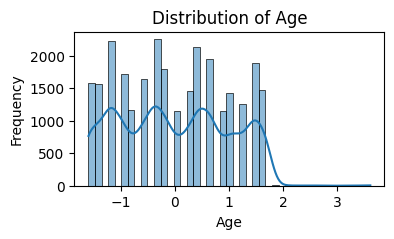

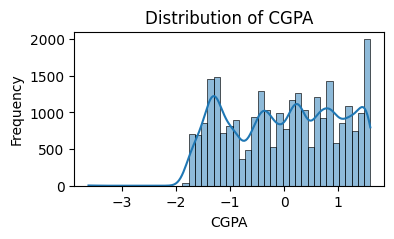

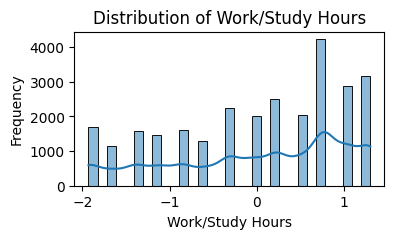

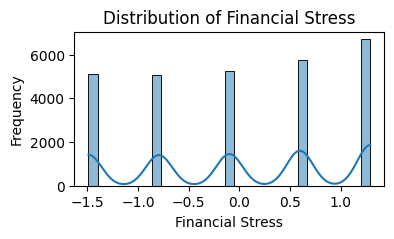

In [ ]:
print('After Preprocessing: \n')

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df_03[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_03, df_02, test_size=0.2, random_state=42)

**Logistic Regression Model training**

---



In [ ]:
## TRAINING THE MODEL USING LOGISTIC REGRESSION
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

## ACCURACY
log_reg_accuracy = log_reg_model.score(X_test, y_test)
print(f"Accuracy: {log_reg_accuracy*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.66%


In [ ]:
log_reg_y_pred=log_reg_model.predict(X_test)
log_reg_mse = mean_squared_error(y_test, log_reg_y_pred)
log_reg_r2 = r2_score(y_test, log_reg_y_pred)
print(f'Mean Squared Error : {log_reg_mse}')
print(f'R^2 Score : {log_reg_r2}')

Mean Squared Error : 0.16341157498656156
R^2 Score : 0.3291000989371572


*Logistic Regression Confusion Matrix*

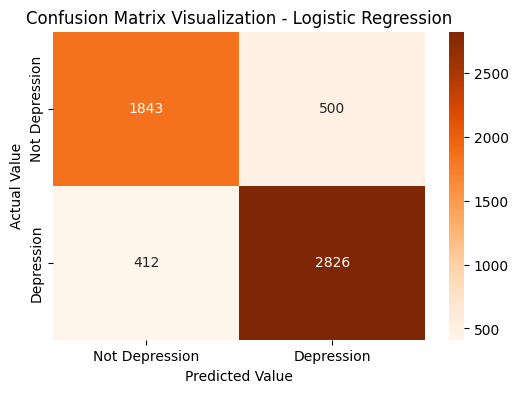

In [ ]:
log_reg_confusion_matrix=confusion_matrix(y_test,log_reg_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix Visualization - Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

**SVM Model Training**

---



In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 83.61%


In [ ]:
y_pred_svm=svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)
print(f'Mean Squared Error : {svm_mse}')
print(f'R^2 Score : {svm_r2}')

Mean Squared Error : 0.16394911306217524
R^2 Score : 0.32689319136787154


*Svm confusion Matrix*

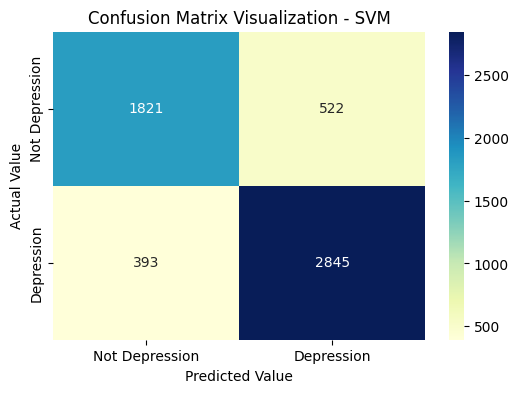

In [ ]:
svm_confusion_matrix=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix Visualization - SVM')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

**Random Forest Model Training**

---



In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 82.75%


In [ ]:
y_pred_rf=random_forest_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error : {rf_mse}')
print(f'R^2 Score : {rf_r2}')

Mean Squared Error : 0.17254972227199428
R^2 Score : 0.29158267025930085


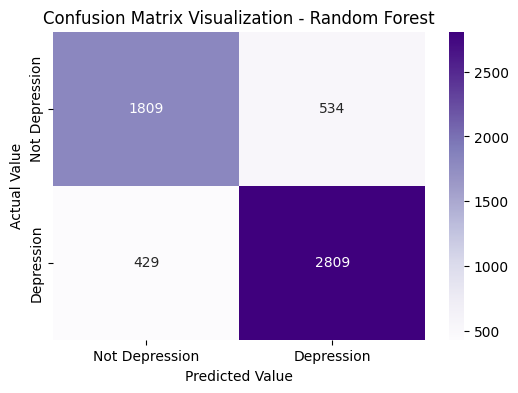

In [ ]:
rf_confusion_matrix=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix Visualization - Random Forest')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

**Decision Tree Model Training**

---



In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Random Forest Accuracy: {accuracy_dt*100:.2f}%")

Random Forest Accuracy: 76.89%


In [ ]:
y_pred_dt=decision_tree_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f'Mean Squared Error : {dt_mse}')
print(f'R^2 Score : {dt_r2}')

Mean Squared Error : 0.2311413725138864
R^2 Score : 0.05102974520716308


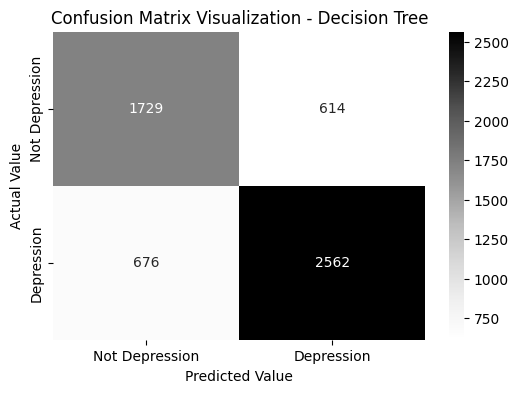

In [ ]:
dt_confusion_matrix=confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Greys', xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix Visualization - Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Feature Importance Visualization (Random Forest and Decision Tree)

---



Random Forest

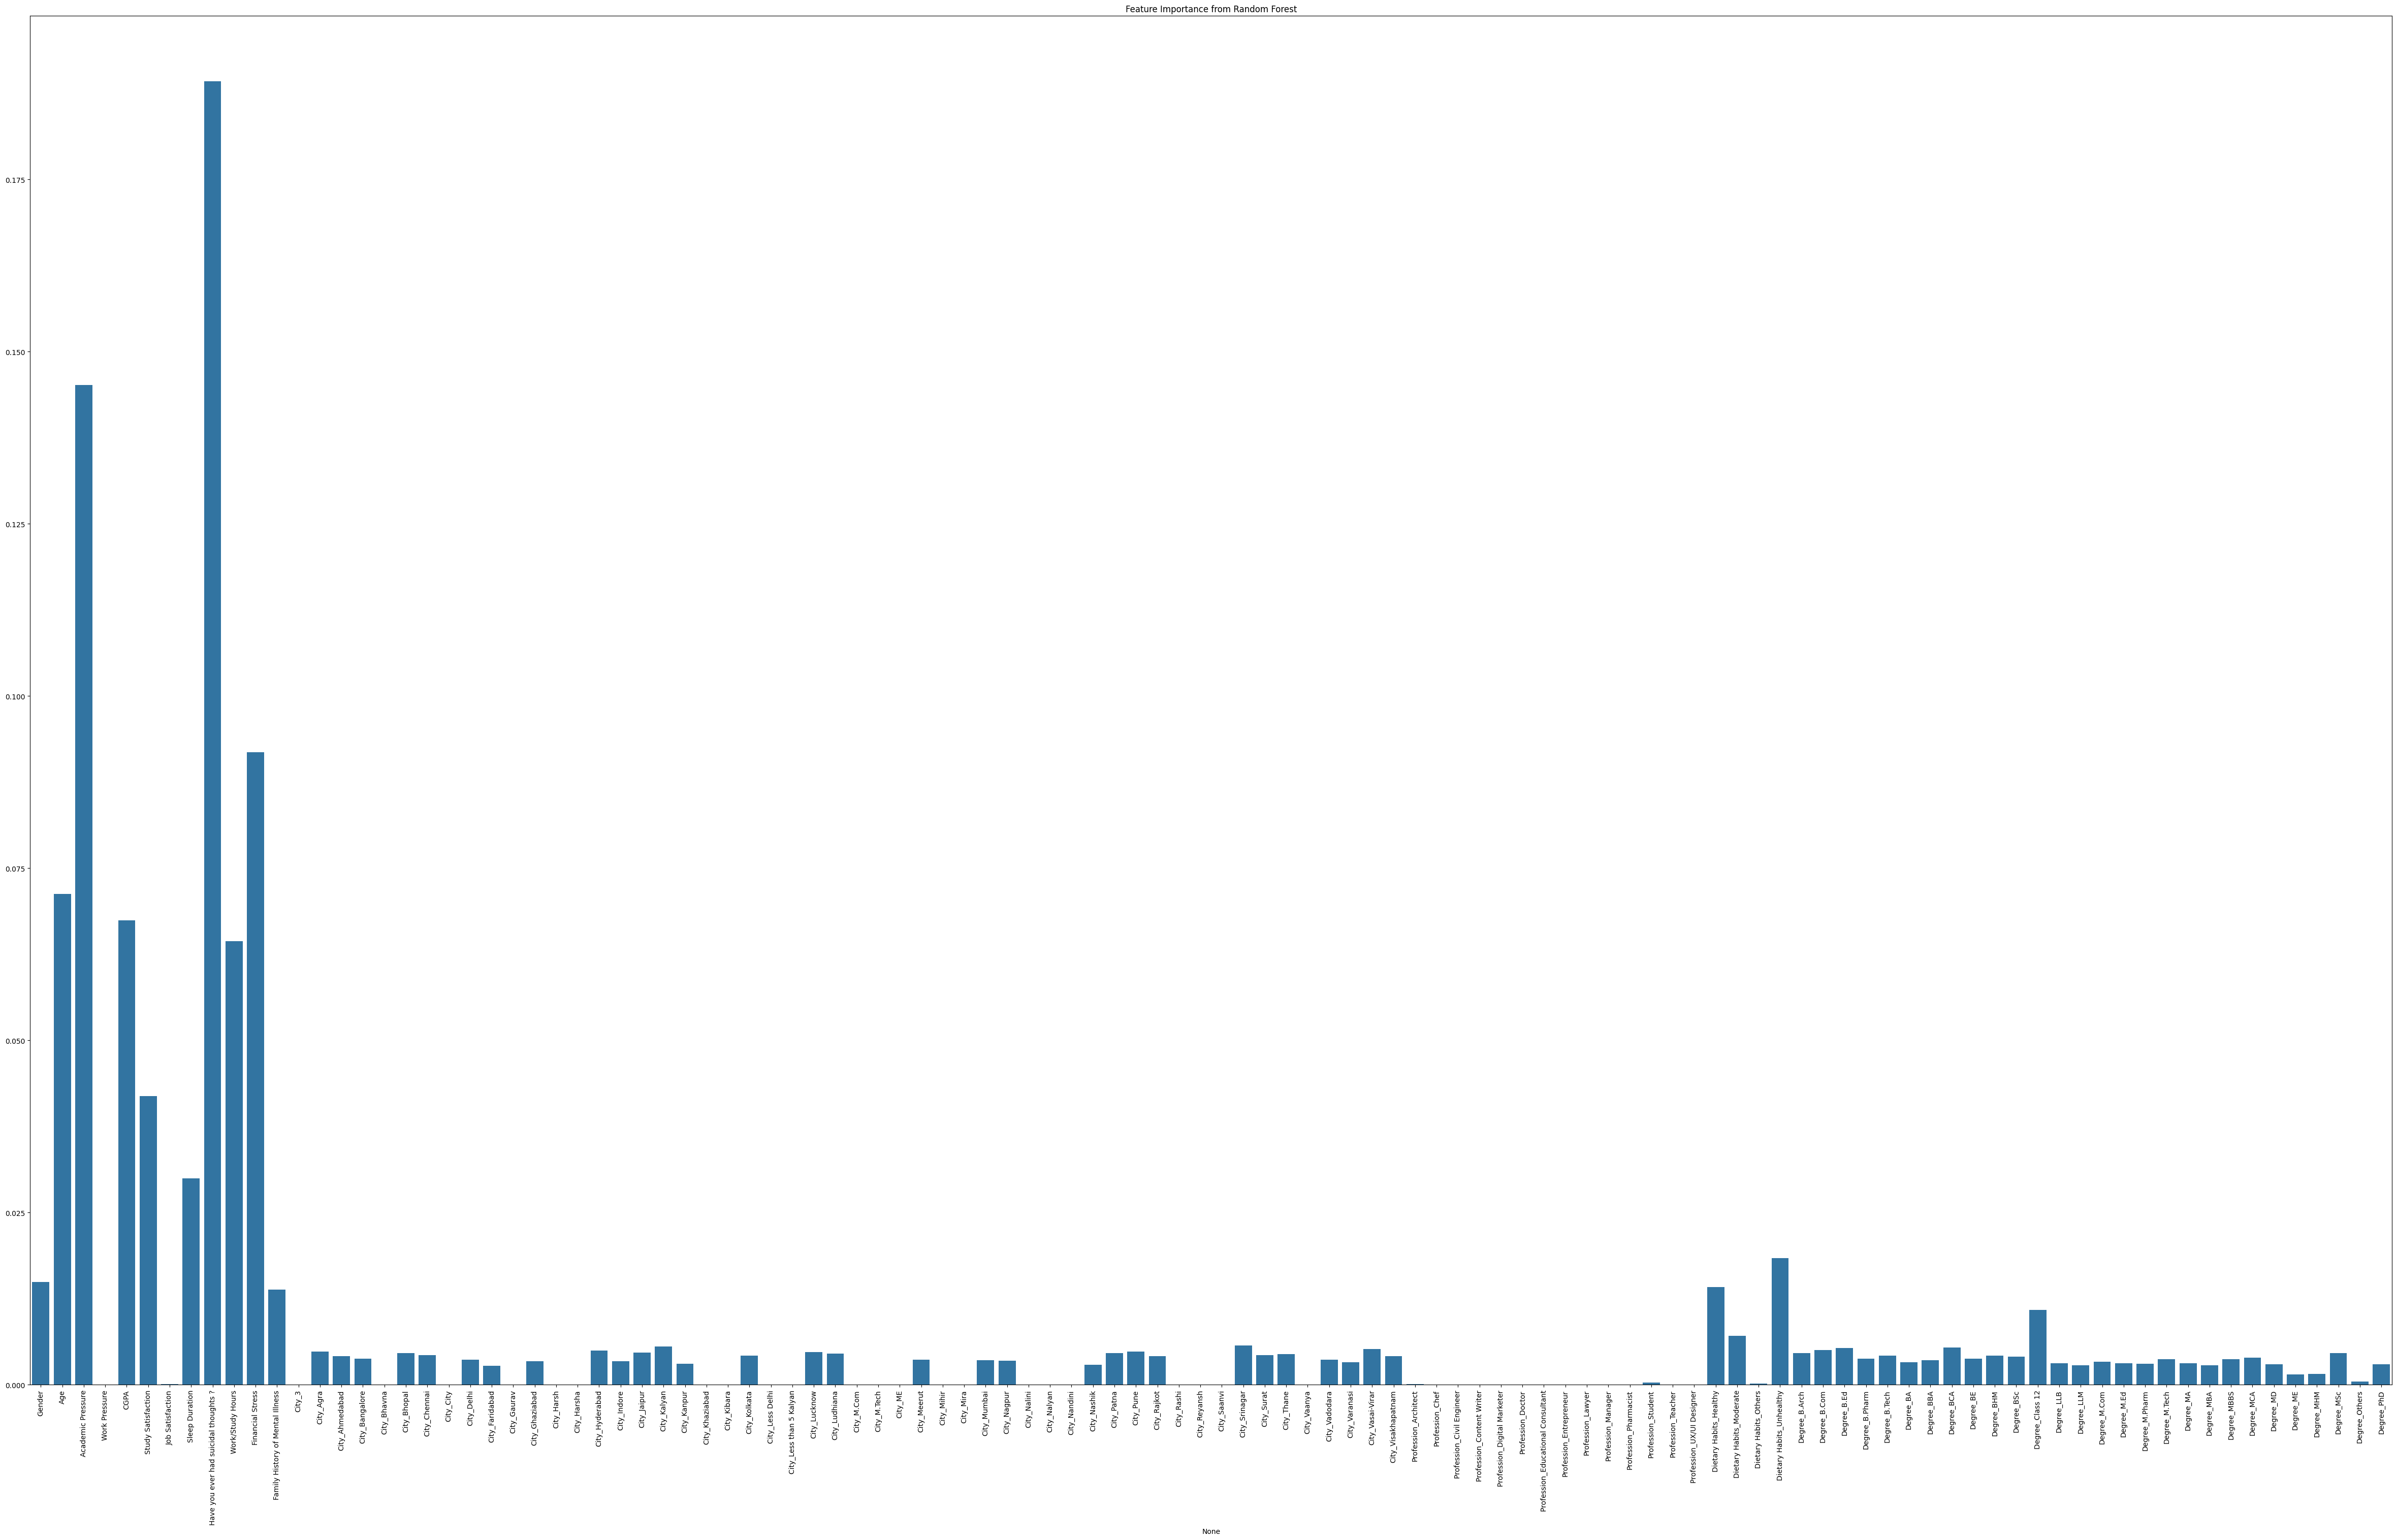

In [ ]:
# Plot feature importance from Random Forest
rf_feature_importance = random_forest_model.feature_importances_

plt.figure(figsize=(60, 35))
sns.barplot(x=df_03.columns, y=rf_feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)
plt.show()


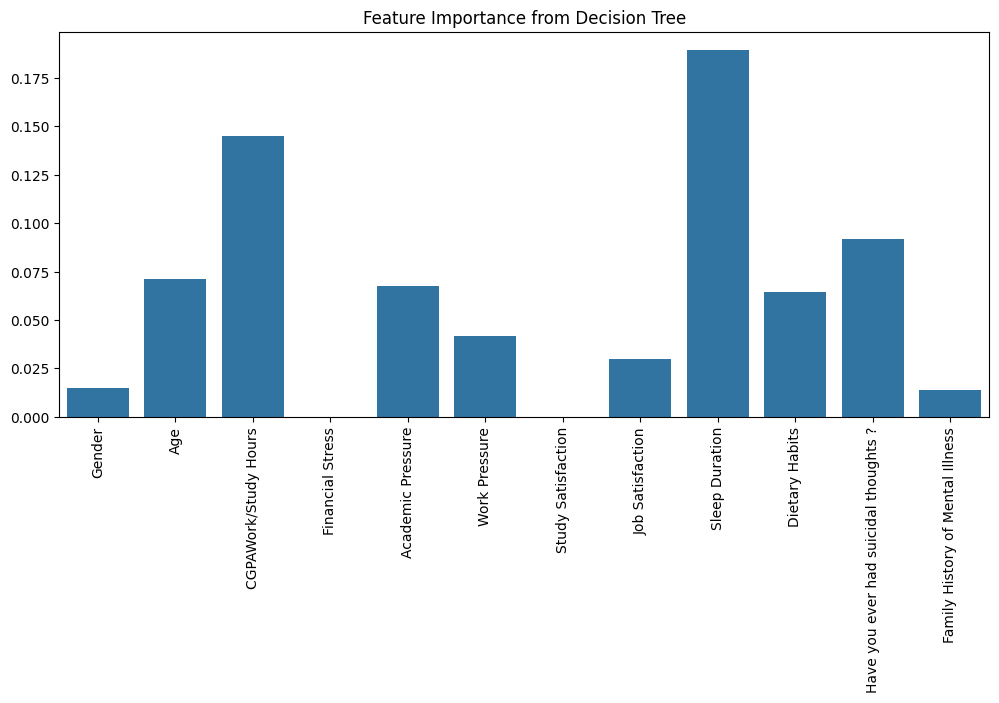

In [ ]:
selcted_cols = ["Gender","Age","CGPA"'Work/Study Hours','Financial Stress','Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

# Plotting feature importance for only selected columns
rf_feature_importance = random_forest_model.feature_importances_
plt.figure(figsize=(12,5))
sns.barplot(x=selcted_cols, y=rf_feature_importance[:len(selcted_cols)])
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90)
plt.show()

Decision Tree

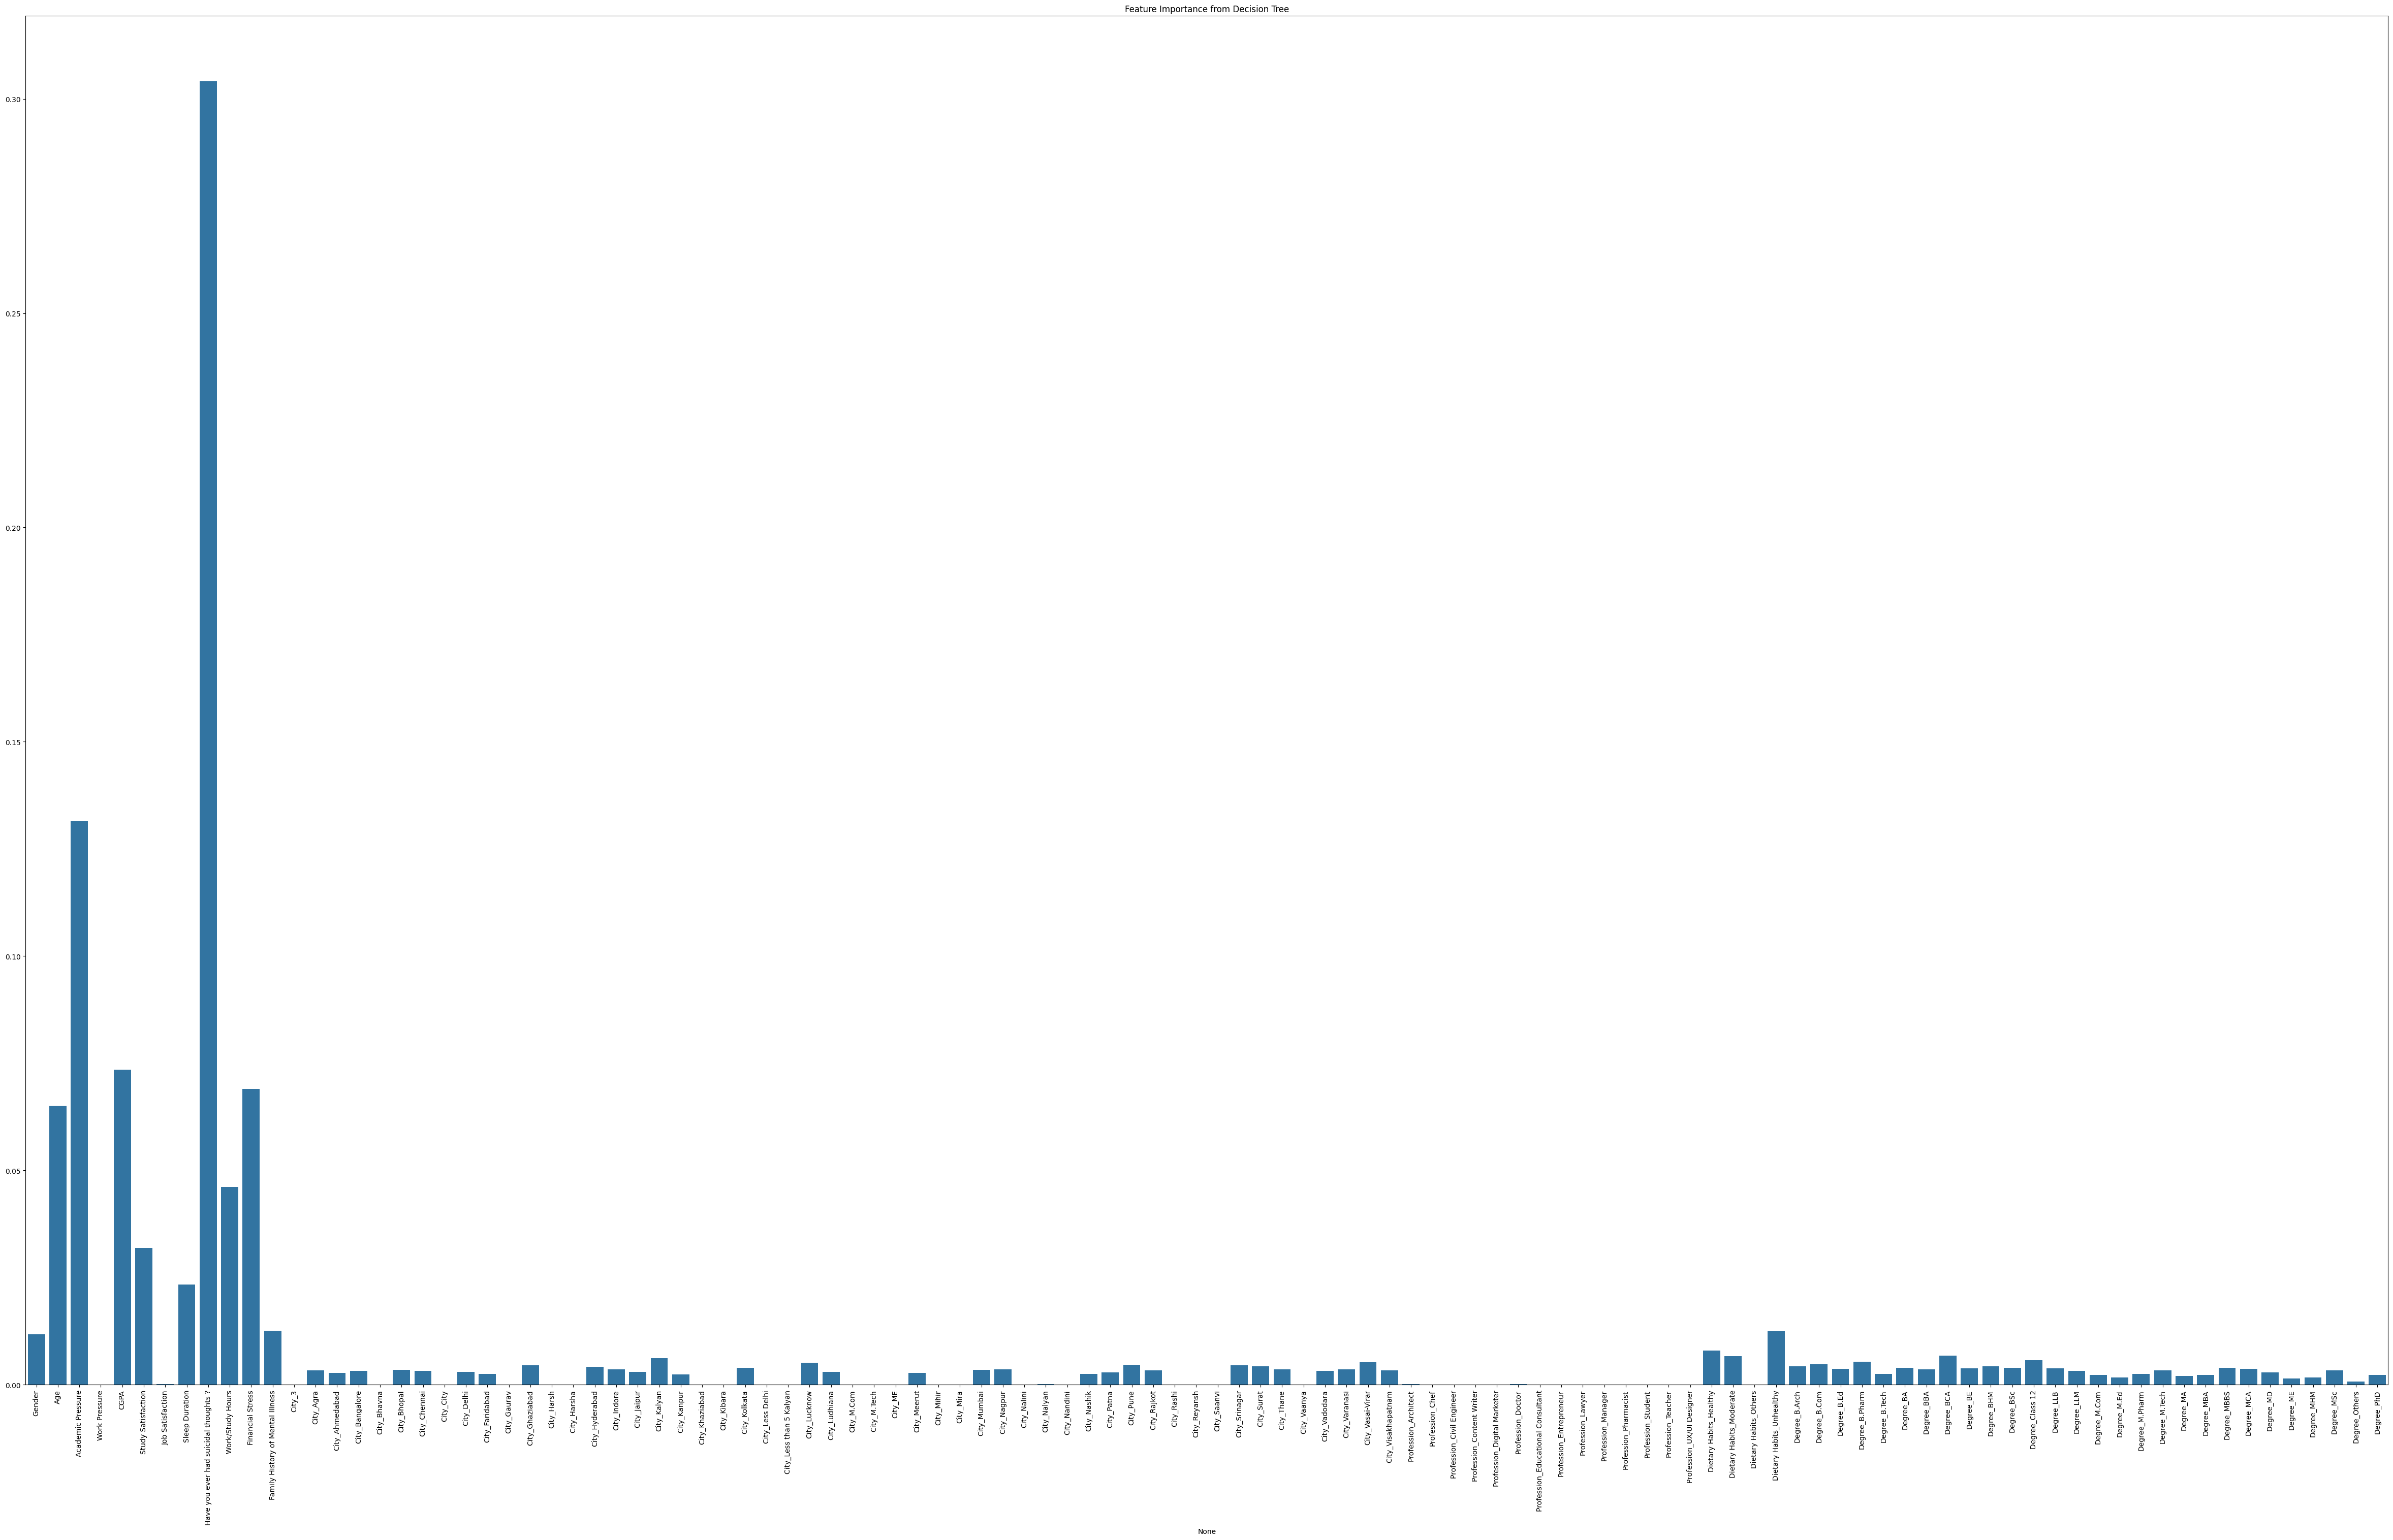

In [ ]:

dt_feature_importance = decision_tree_model.feature_importances_
plt.figure(figsize=(60, 35))
sns.barplot(x=df_03.columns, y=dt_feature_importance)
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90)
plt.show()

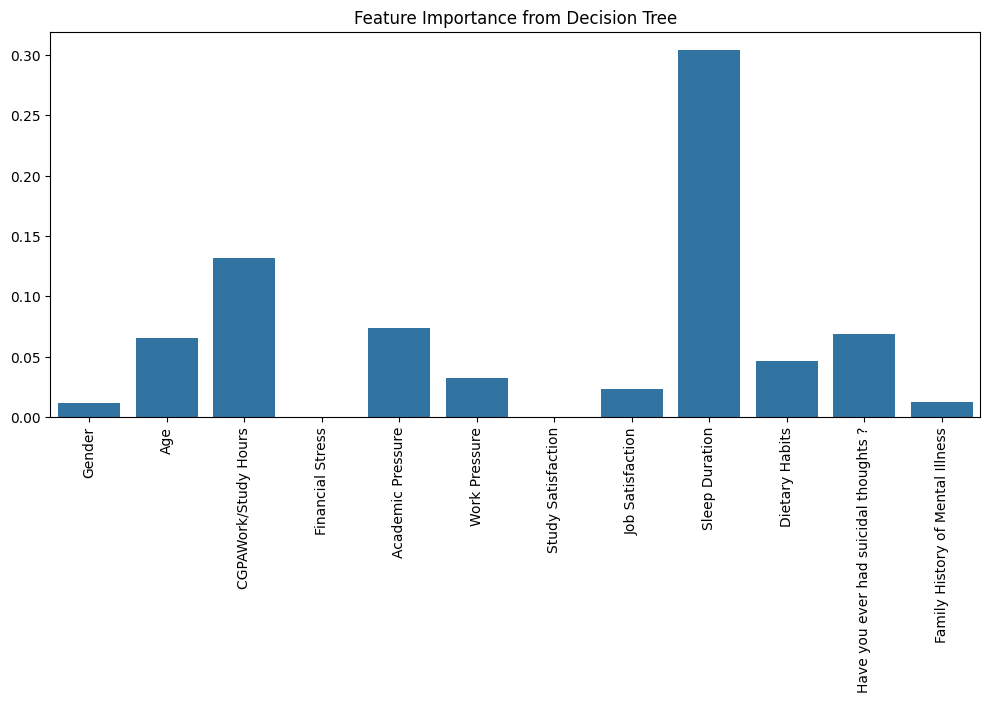

In [ ]:
selcted_cols = ["Gender","Age","CGPA"'Work/Study Hours','Financial Stress','Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

# Plotting feature importance for only selected columns
dt_feature_importance = decision_tree_model.feature_importances_
plt.figure(figsize=(12,5))
sns.barplot(x=selcted_cols, y=dt_feature_importance[:len(selcted_cols)])
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90)
plt.show()


**Ensemble Model**

---



In [ ]:

ensemble_model = VotingClassifier(estimators=[
    ('lr', log_reg_model),
    ('rf', random_forest_model),
    ('svm', svm_model),
    ('dt', decision_tree_model)
], voting='hard')

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Ensemble Model Accuracy: 83.66%


In [ ]:
y_pred_en=ensemble_model.predict(X_test)
en_mse = mean_squared_error(y_test, y_pred_ensemble)
en_r2 = r2_score(y_test, y_pred_ensemble)
print(f'Mean Squared Error : {en_mse}')
print(f'R^2 Score : {en_r2}')

Mean Squared Error : 0.16341157498656156
R^2 Score : 0.3291000989371572


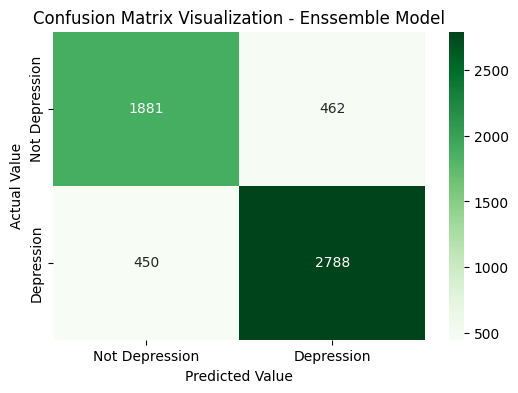

In [ ]:
en_confusion_matrix=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(en_confusion_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Depression', 'Depression'], yticklabels=['Not Depression', 'Depression'])
plt.title('Confusion Matrix Visualization - Enssemble Model')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()